<a href="https://colab.research.google.com/github/MOHAMEDAAKIFASRAR/Neural-Network-Regression-Model/blob/main/DL_EXP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
def aakif():
    print("Name: MOHAMED AAKIF ASRAR S")
    print("Register Number: 212223240088")

In [8]:
dataset1 = pd.read_csv('/content/DL-Exp1 - Sheet1 (1).csv')

X = dataset1[['Input']].values
y = dataset1[['Output']].values


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=33
)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [13]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 6)
        self.fc3 = nn.Linear(6, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}
        aakif()
        print("Neural Network Regression Model Initialized")

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


Name: MOHAMED AAKIF ASRAR S
Register Number: 212223240088
Neural Network Regression Model Initialized
Epoch [0/2000], Loss: 392.088959
Epoch [200/2000], Loss: 1.949060
Epoch [400/2000], Loss: 0.055458
Epoch [600/2000], Loss: 0.006666
Epoch [800/2000], Loss: 0.001918
Epoch [1000/2000], Loss: 0.000436
Epoch [1200/2000], Loss: 0.000077
Epoch [1400/2000], Loss: 0.000010
Epoch [1600/2000], Loss: 0.000001
Epoch [1800/2000], Loss: 0.000000
Test Loss: 0.322731


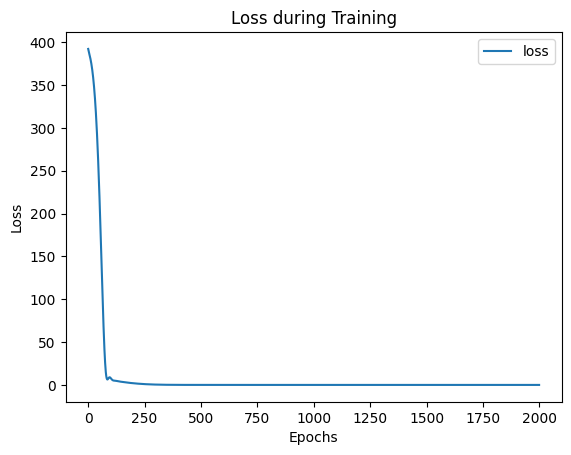

Name: MOHAMED AAKIF ASRAR S
Register Number: 212223240088
Prediction for input 9: 20.9999942779541


In [15]:
ai_aakif = NeuralNet()

criterion = nn.MSELoss()
optimizer = optim.Adam(ai_aakif.parameters(), lr=0.01)

def train_model(ai_rash, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = ai_rash(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        ai_rash.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

train_model(ai_aakif, X_train_tensor, y_train_tensor, criterion, optimizer)

with torch.no_grad():
    test_loss = criterion(ai_aakif(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

loss_df = pd.DataFrame(ai_aakif.history)

loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_aakif(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()

aakif()
print(f'Prediction for input 9: {prediction}')